## __Mini-Batch SGD implementation on Boston Housing dataset__

#### [1.1] Import Statements

In [868]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from math import pow
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import random
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#### [1.2] Load Dataset

In [869]:
X = load_boston().data
Y = load_boston().target

#### [2.1] Train Test Split

In [870]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### [3.1] Applying Mini-Batch SGD

In [871]:
def plott(Y_samples, y_pred, title):
    plt.scatter(Y_samples, y_pred)
    plt.xlabel('Y sample')
    plt.ylabel('Y pred')
    plt.title(title)

In [872]:
#Source: https://stackoverflow.com/questions/15923826/random-row-selection-in-pandas-dataframe
# https://stackoverflow.com/questions/17260109/sample-two-pandas-dataframes-the-same-way

def random_sampling(X, Y, n_samples):
    X = pd.DataFrame(X)
    X_samples = X.sample(n=n_samples)
    Y_samples = Y[X_samples.index]
    Y_samples = pd.DataFrame(Y_samples)
    return X_samples, Y_samples

In [873]:
#Source: https://machinelearningmastery.com/implement-linear-regression-stochastic-gradient-descent-scratch-python/
# https://stackoverflow.com/questions/50328545/stochastic-gradient-descent-for-linear-regression-on-partial-derivatives

def stochastic_gradient_descent(X_data, y_data, epochs, n_samples, learning_rate_given):
    w_0 = np.random.normal(0,1, 13)
    eta0 = 0.01
    power_t = 0.5
    t = 1
    b_0 = np.random.rand()
    for epoch in range(epochs):
        if epoch == 0:
            w_i = w_0
            b_i = b_0
        else:
            w_i = w_latest
            b_i = b_latest
        
        #sampling data
        X_samples, Y_samples = random_sampling(X_data, y_data, n_samples)
        X_samples = X_samples.as_matrix()
        Y_samples = Y_samples.as_matrix()
        
        if learning_rate_given == 'constant':
            eta = eta0
        elif learning_rate_given == 'invscaling':
            if epoch == 0:
                eta = eta0
            else:
                t += 1
                eta = eta0 / (t**power_t)
       
        # Initializing derivatives to zero
        m_derivative = np.zeros(13)
        b_derivative = 0
        
        for X_sample, Y_sample in zip(X_samples, Y_samples):
            # m_derivative = -2*x_i(y_i - (w_T*x_i + b_i))
            # b_derivative = -2*(y_i - (w_T*x_i + b_i))
            y_hat = np.dot(w_i.T, X_sample) + b_i
            error = Y_sample - y_hat
            m_derivative += -(2/n_samples) * X_sample * error
            b_derivative += -(2/n_samples) * error
            
        w_latest = m_derivative * eta
        b_latest = b_derivative * eta
        w_latest = w_i - w_latest
        b_latest = b_i - b_latest
    y_pred = []
    for X_sample in X_samples:
        y_pred.append(np.dot(w_latest.T, X_sample) + b_latest)
    train_error = mean_squared_error(Y_samples, np.array(y_pred)) 
    return X_samples, Y_samples, y_pred, w_latest, b_latest, train_error

In [874]:
def mean_sq_error(X_test, y_test, w_latest, b_latest, plot_title):
    
    X_test = pd.DataFrame(X_test)
    y_test = pd.DataFrame(y_test)
    
    X_test = X_test.as_matrix()
    y_test = y_test.as_matrix()
    
    y_pred = []
    for item in X_test:
        y_pred.append(np.dot(w_latest.T, item)+b_latest)
    
    plott(y_test, y_pred, plot_title)
    
    return mean_squared_error(y_test, y_pred)

In [875]:
def sklearn_SGD(X_train, y_train, max_iter_given, learning_rate_given, eta_given):
    if learning_rate_given == 'constant':
        clf = SGDRegressor(max_iter = max_iter_given, learning_rate= learning_rate_given, eta0=eta_given)
    elif learning_rate_given == 'invscaling':
        clf = SGDRegressor(max_iter = max_iter_given, learning_rate= learning_rate_given, eta0=eta_given, power_t=0.25)
    clf.fit(X_train, y_train)
    mse = mean_squared_error(y_train, clf.predict(X_train))
    return clf, mse

#### [3.2] Applying Mini-Batch SGD with fixed learning rate

itr = 100 

In [876]:
# Using implemented Mini-Batch SGD with constant learning rate
X_samples, Y_samples, y_pred, w_latest1, b_latest1, train_error1 = stochastic_gradient_descent(X_train, y_train, 100, 15, 'constant')
print(train_error1)

48.92878984555921


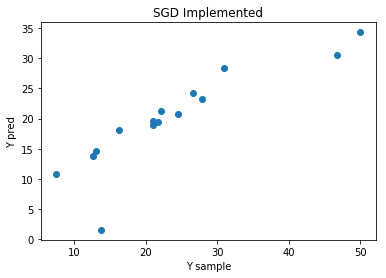

In [877]:
plott(Y_samples, y_pred, 'SGD Implemented')

36.732583474085736


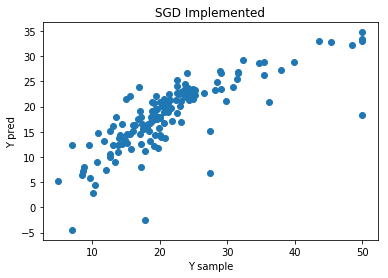

In [878]:
test_error1 = mean_sq_error(X_test, y_test, w_latest1, b_latest1, 'SGD Implemented')
print(test_error1)

In [879]:
# Using Sklearn
clf1, train_mse1 = sklearn_SGD(X_train, y_train, 100, 'constant', 0.01)
test_mse1 = mean_squared_error(y_test, clf1.predict(X_test))
train_mse1

25.44650397100788

itr = 1000 

In [880]:
X_samples, Y_samples, y_pred, w_latest2, b_latest2, train_error2  = stochastic_gradient_descent(X_train, y_train, 1000, 15, 'constant')
print(train_error2)

26.606888825077267


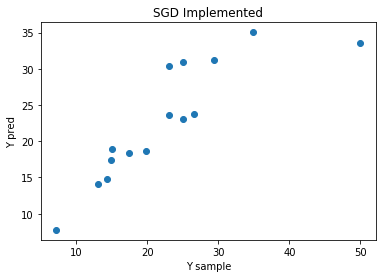

In [881]:
plott(Y_samples, y_pred, 'SGD Implemented')

22.161182808502716


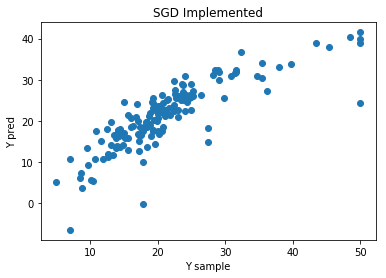

In [882]:
test_error2 = mean_sq_error(X_test, y_test, w_latest2, b_latest2, 'SGD Implemented')
print(test_error2)

In [883]:
clf2, train_mse2 = sklearn_SGD(X_train, y_train, 1000, 'constant', 0.01)
test_mse2 = mean_squared_error(y_test,clf2.predict(X_test))
train_mse2

24.546898911592436

itr = 5000

In [884]:
X_samples, Y_samples, y_pred, w_latest3, b_latest3, train_error3  = stochastic_gradient_descent(X_train, y_train, 5000, 15, 'constant')
print(train_error3)

22.69599928570044


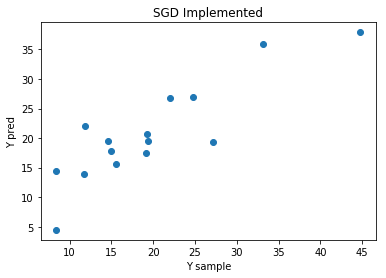

In [885]:
plott(Y_samples, y_pred, 'SGD Implemented')

21.264608591302853


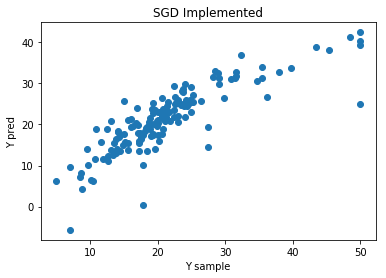

In [886]:
test_error3 = mean_sq_error(X_test, y_test, w_latest3, b_latest3, 'SGD Implemented')
print(test_error3)

In [887]:
clf3, train_mse3= sklearn_SGD(X_train, y_train, 5000, 'constant', 0.01)
test_mse3 = mean_squared_error(y_test,clf1.predict(X_test))
train_mse3

22.920499619484392

itr = 10000

In [888]:
X_samples, Y_samples, y_pred, w_latest4, b_latest4, train_error4 = stochastic_gradient_descent(X_train, y_train, 10000, 15, 'constant')
print(train_error4)

25.75845902947859


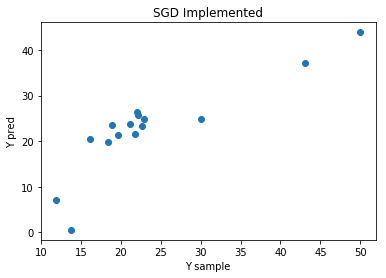

In [889]:
plott(Y_samples, y_pred, 'SGD Implemented')

21.324201420092944


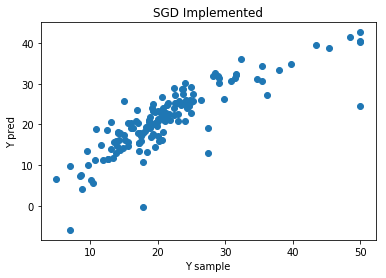

In [890]:
test_error4 = mean_sq_error(X_test, y_test, w_latest4, b_latest4, 'SGD Implemented')
print(test_error4)

In [891]:
clf4, train_mse4 = sklearn_SGD(X_train, y_train, 10000, 'constant', 0.01)
test_mse4 = mean_squared_error(y_test,clf1.predict(X_test))
train_mse4

28.179224200228315

#### [3.3] Applying Mini-Batch SGD With Constant Inverse Scaling Learning Rate

itr = 100

In [892]:
X_samples, Y_samples, y_pred, w_latest5, b_latest5, train_error5 = stochastic_gradient_descent(X_train, y_train, 100, 15, 'invscaling')
train_error5

206.6501596572818

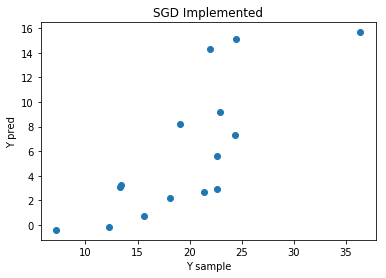

In [893]:
plott(Y_samples, y_pred, 'SGD Implemented')

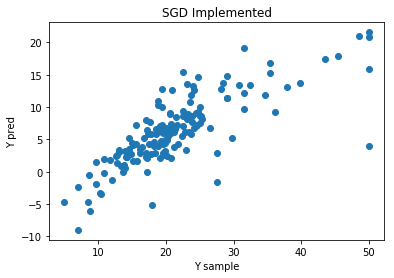

In [894]:
test_error5 = mean_sq_error(X_test, y_test, w_latest5, b_latest5, 'SGD Implemented')

In [895]:
# Using Sklearn
clf1, train_mse5 = sklearn_SGD(X_train, y_train, 100, 'invscaling', 0.01)
test_mse5 = mean_squared_error(y_test,clf1.predict(X_test))
train_mse5

22.60830921541977

itr = 1000

In [896]:
X_samples, Y_samples, y_pred, w_latest6, b_latest6, train_error6 = stochastic_gradient_descent(X_train, y_train, 1000, 15, 'invscaling')
train_error6

48.2860956123789

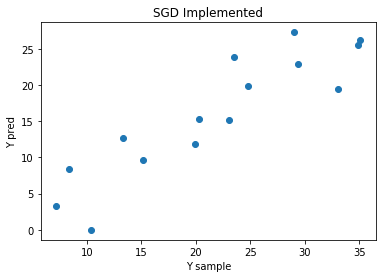

In [897]:
plott(Y_samples, y_pred, 'SGD Implemented')

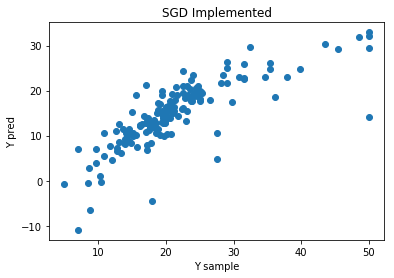

In [898]:
test_error6 = mean_sq_error(X_test, y_test, w_latest6, b_latest6, 'SGD Implemented')

In [899]:
# Using Sklearn
clf1, train_mse6 = sklearn_SGD(X_train, y_train, 1000, 'invscaling', 0.01)
test_mse6 = mean_squared_error(y_test,clf1.predict(X_test))
train_mse6

22.55418955713128

itr = 5000

In [900]:
X_samples, Y_samples, y_pred, w_latest7, b_latest7, train_error7 = stochastic_gradient_descent(X_train, y_train, 5000, 15, 'invscaling')
train_error7

14.961183281522397

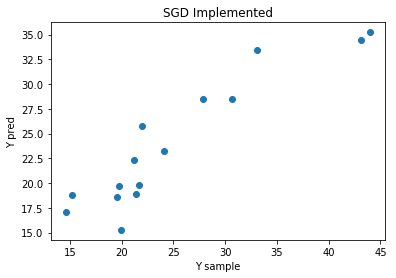

In [901]:
plott(Y_samples, y_pred, 'SGD Implemented')

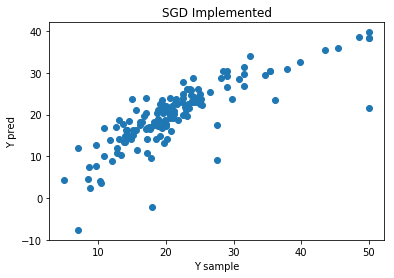

In [902]:
test_error7 = mean_sq_error(X_test, y_test, w_latest7, b_latest7, 'SGD Implemented')

In [903]:
# Using Sklearn
clf1, train_mse7 = sklearn_SGD(X_train, y_train, 5000, 'invscaling', 0.01)
test_mse7 = mean_squared_error(y_test,clf1.predict(X_test))
train_mse7

22.546122092391037

itr = 10000

In [904]:
X_samples, Y_samples, y_pred, w_latest8, b_latest8, train_error8 = stochastic_gradient_descent(X_train, y_train, 10000, 15, 'invscaling')
train_error8

8.308924995459867

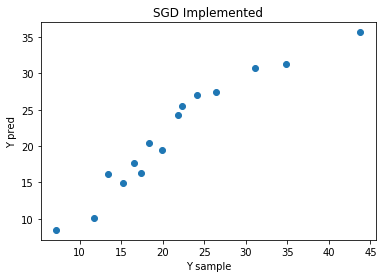

In [905]:
plott(Y_samples, y_pred, 'SGD Implemented')

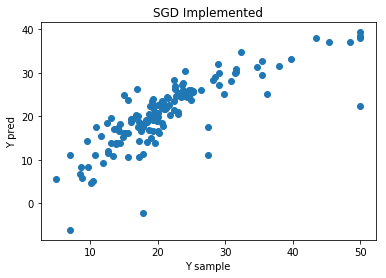

In [906]:
test_error8 = mean_sq_error(X_test, y_test, w_latest8, b_latest8, 'SGD Implemented')

In [907]:
# Using Sklearn
clf1, train_mse8 = sklearn_SGD(X_train, y_train, 10000, 'invscaling', 0.01)
test_mse8 = mean_squared_error(y_test,clf1.predict(X_test))
train_mse8

22.545657510733108

# [4.1] Conclusions

In [910]:
#Source: http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
    
model_metric = PrettyTable()

model_metric = PrettyTable(["Algorithm", "Learning Rate Type", "Learning Rate", 'No. of Iterations', 'Train MSE', 'Test MSE'])

model_metric.add_row(["SGD Implemented","constant", "0.01", "100", train_error1, test_error1])
model_metric.add_row(["SGD Implemented","constant", "0.01", "1000", train_error2, test_error2])
model_metric.add_row(["SGD Implemented","constant", "0.01", "5000", train_error3, test_error3])
model_metric.add_row(["SGD Implemented","constant", "0.01", "10000", train_error4, test_error4])
model_metric.add_row(["SGD Implemented","invscaling", "0.01", "100", train_error5, test_error5])
model_metric.add_row(["SGD Implemented","invscaling", "0.01", "1000", train_error6, test_error6])
model_metric.add_row(["SGD Implemented","invscaling", "0.01", "5000", train_error7, test_error7])
model_metric.add_row(["SGD Implemented","invscaling", "0.01", "10000", train_error8, test_error8])

model_metric.add_row(["Sklearn","constant", "0.01", "100", train_mse1, test_mse1])
model_metric.add_row(["Sklearn","constant", "0.01", "1000", train_mse2, test_mse2])
model_metric.add_row(["Sklearn","constant", "0.01", "5000", train_mse3, test_mse3])
model_metric.add_row(["Sklearn","constant", "0.01", "10000", train_mse4, test_mse4])
model_metric.add_row(["Sklearn","invscaling", "0.01", "100", train_mse5, test_mse5])
model_metric.add_row(["Sklearn","invscaling", "0.01", "1000", train_mse6, test_mse6])
model_metric.add_row(["Sklearn","invscaling", "0.01", "5000", train_mse7, test_mse7])
model_metric.add_row(["Sklearn","invscaling", "0.01", "10000", train_mse8, test_mse8])

print(model_metric.get_string(start=0))

+-----------------+--------------------+---------------+-------------------+--------------------+--------------------+
|    Algorithm    | Learning Rate Type | Learning Rate | No. of Iterations |     Train MSE      |      Test MSE      |
+-----------------+--------------------+---------------+-------------------+--------------------+--------------------+
| SGD Implemented |      constant      |      0.01     |        100        | 48.92878984555921  | 36.732583474085736 |
| SGD Implemented |      constant      |      0.01     |        1000       | 26.606888825077267 | 22.161182808502716 |
| SGD Implemented |      constant      |      0.01     |        5000       | 22.69599928570044  | 21.264608591302853 |
| SGD Implemented |      constant      |      0.01     |       10000       | 25.75845902947859  | 21.324201420092944 |
| SGD Implemented |     invscaling     |      0.01     |        100        | 206.6501596572818  | 257.22810197394836 |
| SGD Implemented |     invscaling     |      0.

## [4.2] Steps for implementing the Mini-Batch SGD



Equations of Mini-batch SGD for Linear regression: 

\begin{equation*}
\frac{\partial L}{\partial w} = w_0 -  \sum_{k=1}^j -(2/j) x_i (y_i - (w^T * x_i + b_i))
\end{equation*}

\begin{equation*}
\frac{\partial L}{\partial b} = b_0 -  \sum_{k=1}^j -(2/j) (y_i - (w^T * x_i + b_i))
\end{equation*}



1) Using the train data to find the components of the SGD for Linear regression such as m_derivative(w_i) and b_derivative(b_i) for a batch of randomly sampled points from train data for 'n' number of epochs. For every epoch a new batch is sampled here.


2) After running for n epochs, we'll obtain the optimal m_derivative and b_derivative values for the nth batch which is sum of m_derivative and b_derivative for all the points. Now multiply both of them with the learning rate to get w_i and b_i. Now, get w_0 and b_0 from n-1 epoch of the batch and subtract with the w_i and b_i respectively to get the updated values w_updated and b_updated.


3) When a point(x_test) in test data is given we'll calculate the following for the price prediction:
            
            y_pred = w_updated * x_test+ b_updated


4) The above step is repeated for all the test data points and all the predicted values are stored in a list. 


5) If the prices of the corresponding test data is present, we can plot a scatter plot for the predicted values and the actual values for the test data. Similar plot can be done for train data as well.


6) Mean Square Error is calculated for the test data to check the performance of the model on the unseen data. If this is high then the model performance is bad.

## [4.3] Observations

1. Mini-Batch SGD for linear regression is implemeted with the help of Sklearn's SGDRegressor. This algorithm uses two types of learning rates:
        a) Constant
        b) Inverse Scaling or invscaling


2. Sklearn's SGDRegressor is also utilized to generate results on the same data.

3. No. of iterations used for both type of implementations are 100, 1000, 5000, 1000

4. The Mean Square Errors(MSE) of the implemented Mini-Batch SGD both on Train and Test data are very close to that of Sklearn's SGDRegressor results except in 3 cases.

5. The results are consistent and reproducible.

6. By observation on all the graphs, the points on the graph are aligned towards a straight line.